# Support the Customer Success Management Team (CSM Team) with valuable insights

# 1)- Import key modules


In [0]:
# I am an engineer. I care only about error not warning. So, let's be maverick and ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function

In [0]:
#For Visuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [0]:
# For processing and maths
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 2)- Loading data using pandas

In [0]:
df =pd.read_csv('Data_Analyst_Company_Activity.csv')
df.head()

,company_id,id,date,intros,invites,hires,csm_mails,csm
0,1,1,2016-01-01,10,0,0,0,"Rice, Ethan"
1,1,2,2016-01-03,4,2,0,0,"Rice, Ethan"
2,1,3,2016-01-07,10,0,0,2,"Rice, Ethan"
3,1,4,2016-01-11,6,1,1,0,"Rice, Ethan"
4,1,5,2016-01-14,6,0,0,0,"Rice, Ethan"


In [0]:
df.shape

(14514, 8)

In [0]:
print(df.columns)

Index(['company_id', 'id', 'date', 'intros', 'invites', 'hires', 'csm_mails',
       'csm'],
      dtype='object')


# 3)-Data Exploration

In [0]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
company_id,int64
id,int64
intros,int64
invites,int64
hires,int64
csm_mails,int64
date,object
csm,object


In [0]:
df.hires.value_counts()

0    14335
1      178
2        1
Name: hires, dtype: int64

In [0]:
df.csm_mails.value_counts()

0    11356
1     2706
2      405
3       43
4        4
Name: csm_mails, dtype: int64

In [0]:
df.csm.value_counts()

Schneeberger, Robert    2402
Anderson, Adrianna      2202
Baca, Sarah             1550
Johnson, Jacob          1467
Kappert, Taylor         1441
Phelps, Logan           1270
el-Bagheri, Shaafia     1139
Rice, Ethan              905
Gehring, Eric            710
Harris, Antonio          705
Slack, Katherine         509
Lucero, Kathrine         214
Name: csm, dtype: int64

### Dealing with time series

In [0]:
#Convert object to datetime. call spade a spade
date=df['date']
df['Date']=pd.to_datetime(date)

In [0]:
dtype(df['Date'])

dtype('<M8[ns]')

Now we got date-time object. Let's drop object variable of date

In [0]:
df = df.drop(['date'], axis=1)

In [0]:
table_dtype = _tbl_dtype(df)
table_dtype

,Data Type
company_id,int64
id,int64
intros,int64
invites,int64
hires,int64
csm_mails,int64
Date,datetime64[ns]
csm,object


In [0]:
# check what happened year-vice
df['Date'].dt.year[:5]

0    2016
1    2016
2    2016
3    2016
4    2016
Name: Date, dtype: int64

In [0]:
df['Date'].dt.year.sort_values()[:5]

0       2016
5161    2016
5160    2016
5159    2016
5158    2016
Name: Date, dtype: int64

In [0]:
data_year=df['Date'].dt.year.sort_values()

In [0]:
j=df.groupby(data_year)['csm_mails'].value_counts()

In [0]:
j[:5]

Date  csm_mails
2016  0            5648
      1            1205
      2             162
      3              13
      4               1
Name: csm_mails, dtype: int64

In [0]:
j=j.unstack('csm_mails')

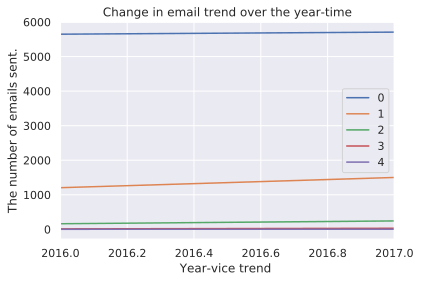

In [0]:
j.plot()
plt.xlabel('Year-vice trend ')
plt.ylabel('The number of emails sent.')
plt.title('Change in email trend over the year-time')
plt.legend()
plt.show()

not very interesting pattern

In [0]:
data_month=df['Date'].dt.month.sort_values()

In [0]:
j=df.groupby(data_month)['csm_mails'].value_counts()
j=j.unstack('csm_mails')

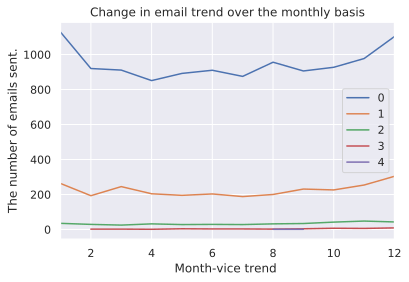

In [0]:
j.plot()
plt.xlabel('Month-vice trend ')
plt.ylabel('The number of emails sent.')
plt.title('Change in email trend over the monthly basis')
plt.legend()
plt.show()

That's better. We can see 0 being high. So, there is not much communication 

In [0]:
df['invites'].value_counts()

0    8227
1    4540
2    1377
3     296
4      56
5      15
6       3
Name: invites, dtype: int64

In [0]:
k=df.groupby(data_month)['invites'].value_counts()
k=k.unstack('invites')

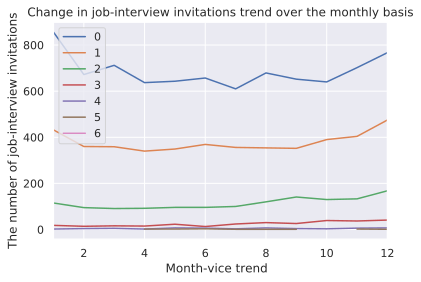

In [0]:
k.plot()
plt.xlabel('Month-vice trend  ')
plt.ylabel('The number of job-interview invitations')
plt.title('Change in job-interview invitations trend over the monthly basis')
plt.legend()
plt.show()

In [0]:
df.head()

,company_id,id,intros,invites,hires,csm_mails,csm,Date
0,1,1,10,0,0,0,"Rice, Ethan",2016-01-01
1,1,2,4,2,0,0,"Rice, Ethan",2016-01-03
2,1,3,10,0,0,2,"Rice, Ethan",2016-01-07
3,1,4,6,1,1,0,"Rice, Ethan",2016-01-11
4,1,5,6,0,0,0,"Rice, Ethan",2016-01-14


In [0]:
df_csm=df.copy()

In [0]:
df_csm.head()

,company_id,id,intros,invites,hires,csm_mails,csm,Date
0,1,1,10,0,0,0,"Rice, Ethan",2016-01-01
1,1,2,4,2,0,0,"Rice, Ethan",2016-01-03
2,1,3,10,0,0,2,"Rice, Ethan",2016-01-07
3,1,4,6,1,1,0,"Rice, Ethan",2016-01-11
4,1,5,6,0,0,0,"Rice, Ethan",2016-01-14


In [0]:
df_csm = pd.get_dummies(df_csm, columns=['csm'])

In [0]:
df_csm.head()

,company_id,id,intros,invites,hires,csm_mails,Date,"csm_Anderson, Adrianna","csm_Baca, Sarah","csm_Gehring, Eric","csm_Harris, Antonio","csm_Johnson, Jacob","csm_Kappert, Taylor","csm_Lucero, Kathrine","csm_Phelps, Logan","csm_Rice, Ethan","csm_Schneeberger, Robert","csm_Slack, Katherine","csm_el-Bagheri, Shaafia"
0,1,1,10,0,0,0,2016-01-01,0,0,0,0,0,0,0,0,1,0,0,0
1,1,2,4,2,0,0,2016-01-03,0,0,0,0,0,0,0,0,1,0,0,0
2,1,3,10,0,0,2,2016-01-07,0,0,0,0,0,0,0,0,1,0,0,0
3,1,4,6,1,1,0,2016-01-11,0,0,0,0,0,0,0,0,1,0,0,0
4,1,5,6,0,0,0,2016-01-14,0,0,0,0,0,0,0,0,1,0,0,0


In [0]:
#Standardize
clmns = ['invites', 'hires','csm_Anderson, Adrianna', 'csm_Baca, Sarah','csm_Gehring, Eric','csm_Harris, Antonio',
         'csm_Johnson, Jacob','csm_Kappert, Taylor','csm_Lucero, Kathrine','csm_Phelps, Logan',
         'csm_Rice, Ethan','csm_Schneeberger, Robert','csm_Slack, Katherine','csm_el-Bagheri, Shaafia']

In [0]:
df_csm_std = stats.zscore(df_csm[clmns])

In [0]:
#Cluster the data
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_csm_std)
labels = kmeans.labels_

In [0]:
#Glue back to originaal data
df_csm['clusters'] = labels

In [0]:
#Add the column into our list
clmns.extend(['clusters'])

In [0]:
#Lets analyze the clusters
print (df_csm[clmns].groupby(['clusters']).mean())

           invites     hires  ...  csm_Slack, Katherine  csm_el-Bagheri, Shaafia
clusters                      ...                                               
0         0.527607  0.010907  ...              0.000000                   0.0000
1         0.592090  0.012570  ...              0.039013                   0.0873

[2 rows x 14 columns]


# checking group contribution

In [0]:
df.head()

,company_id,id,intros,invites,hires,csm_mails,csm,Date
0,1,1,10,0,0,0,"Rice, Ethan",2016-01-01
1,1,2,4,2,0,0,"Rice, Ethan",2016-01-03
2,1,3,10,0,0,2,"Rice, Ethan",2016-01-07
3,1,4,6,1,1,0,"Rice, Ethan",2016-01-11
4,1,5,6,0,0,0,"Rice, Ethan",2016-01-14


In [0]:
bycsm=df.groupby("csm").company_id.value_counts(normalize=True)
bycsm

csm                   company_id
Anderson, Adrianna    6             0.218892
                      4             0.203906
                      3             0.198456
                      9             0.188919
                      12            0.131244
                      52            0.058583
Baca, Sarah           2             0.287742
                      31            0.164516
                      25            0.141935
                      32            0.136774
                      50            0.120000
                      55            0.078065
                      56            0.070968
Gehring, Eric         18            0.373239
                      60            0.261972
                      44            0.229577
                      49            0.135211
Harris, Antonio       8             0.643972
                      24            0.356028
Johnson, Jacob        15            0.286980
                      38            0.154738
                      

This shows how management is linked and clustered with comapnies.

In [0]:
bycsm.index

MultiIndex(levels=[['Anderson, Adrianna', 'Baca, Sarah', 'Gehring, Eric', 'Harris, Antonio', 'Johnson, Jacob', 'Kappert, Taylor', 'Lucero, Kathrine', 'Phelps, Logan', 'Rice, Ethan', 'Schneeberger, Robert', 'Slack, Katherine', 'el-Bagheri, Shaafia'], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]],
           codes=[[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 11, 11, 11, 11, 11], [5, 3, 2, 8, 11, 51, 1, 30, 24, 31, 49, 54, 55, 17, 59, 43, 48, 7, 23, 14, 37, 41, 50, 6, 47, 58, 15, 32, 26, 19, 36, 28, 42, 13, 29, 22, 35, 56, 52, 0, 18, 25, 20, 10, 16, 12, 57, 27, 46, 34, 40, 45, 44, 4, 38, 9, 39, 21, 53, 33]],
           names=['csm', 'company_id'])

In [0]:
bycsm.unstack()

company_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
csm,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Anderson, Adrianna",NaN,NaN,0.198456,0.203906,NaN,0.218892,NaN,NaN,0.188919,NaN,NaN,0.131244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.058583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Baca, Sarah",NaN,0.287742,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.141935,NaN,NaN,NaN,NaN,NaN,0.164516,0.136774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,0.078065,0.070968,NaN,NaN,NaN,NaN
"Gehring, Eric",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.373239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229577,NaN,NaN,NaN,NaN,0.135211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261972
"Harris, Antonio",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.643972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.356028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Johnson, Jacob",NaN,NaN,NaN,NaN,NaN,NaN,0.110429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.28698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154738,NaN,NaN,NaN,0.138378,NaN,NaN,NaN,NaN,NaN,0.092025,NaN,NaN,0.138378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079073,NaN
"Kappert, Taylor",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2873,NaN,NaN,NaN,0.145038,NaN,NaN,NaN,NaN,NaN,NaN,0.162387,NaN,0.10687,NaN,NaN,NaN,0.178348,NaN,NaN,NaN,0.120056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Lucero, Kathrine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Phelps, Logan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.376378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135433,NaN,NaN,NaN,NaN,NaN,NaN,0.203937,NaN,NaN,NaN,NaN,NaN,0.118898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.081102,NaN,NaN,NaN,0.084252,NaN,NaN,NaN
"Rice, Ethan",0.381215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355801,NaN,0.120442,NaN,NaN,NaN,NaN,0.142541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NaN shows those netities that are not associated with that company. For example; Anderson, Adrianna as group are associated with 3,4,5 and so on<br>
They have no association with 1 ,2,5 and so on

### Let's check if emails make difference

In [0]:
bymail = df.groupby(['csm_mails','csm']).company_id.value_counts(normalize=True)

In [0]:
bymail

csm_mails  csm                   company_id
0          Anderson, Adrianna    6             0.224793
                                 4             0.207713
                                 3             0.198898
                                 9             0.185124
                                 12            0.128926
                                 52            0.054545
           Baca, Sarah           2             0.312284
                                 31            0.144464
                                 25            0.131488
                                 50            0.128893
                                 32            0.116782
                                 55            0.089965
                                 56            0.076125
           Gehring, Eric         18            0.371048
                                 60            0.266223
                                 44            0.229617
                                 49            0.133111
    

**Interesting ! We see which team is suspective to higher e-mails and what are the companies to which they are associated**

Text(0.5, 1.0, 'csm-management')

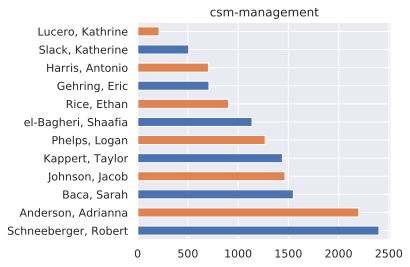

In [0]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);df.csm.value_counts().plot(kind='barh', color=['C0', 'C1']); plt.title('csm-management')


Text(0.5, 1.0, 'csm-management')

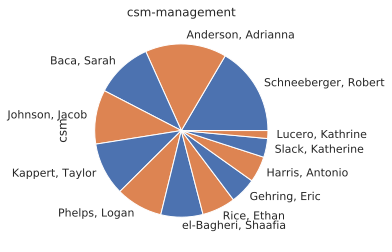

In [0]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1);df.csm.value_counts().plot(kind='pie', colors=['C0', 'C1']); plt.title('csm-management')